In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

 # Функции

In [2]:
def get_data_from_csv(*col_names, file_name):
    return_dict = {}
    for data_col_name in col_names:
        with open(file_name, 'r') as csv_file:
            reader = csv.reader(csv_file,delimiter=';')
            header = next(reader)
            data = []
            time = []
            dataIndex = header.index(data_col_name)
            t = 0
            for row in reader:
                data.append(float(row[dataIndex]))
                time.append(float(t))
                t = t + 1
            return_dict.update({data_col_name:data})
            return_dict.update({data_col_name + "_time":time})
    return return_dict

In [3]:
def print_plot(dict, time_frame, y_label, x_label, *sensors, subplots="true", number_of_subplots=1, title="",first_x_label=""):
    plt.figure(figsize=(15,15))
    plt.rc('font', size=15) 
    i = 1
    for sensor in sensors:
        data = dict[sensor]
        
        if subplots == "true" and i <= number_of_subplots:
            plt.subplot(number_of_subplots,1,i)

        if title=="":
            plt.title(sensor)
        elif i>number_of_subplots:
            plt.title(title)
            plt.xlabel(first_x_label)
        elif i<number_of_subplots:
            plt.title(sensor)
            plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.plot(time_frame,data, label=sensor)
        plt.grid(True)
        if i > number_of_subplots:
            plt.legend()
        i = i + 1

    plt.show()

In [4]:
def cut_data(number_of_points, dict, *fields):
    for field in fields:
        data = dict[field]
        del data[0 : number_of_points]
        del data[len(data)-number_of_points : len(data)]
        dict.update({field:data})

def aperiodic_filter(input, output_array, k, T, tau):
    output_array.append(k*tau/(T+tau)*input + 
                            T/(T+tau)*output_array[len(output_array)-1])
def mm_to_inch(value):
    return value/25.4

In [5]:
def filter(input):

    k = 1
    T = 60
    tau = 0.01
    cycle_counter = 0

    result = []
    result.append(np.mean(input))
    for value in input:
        if cycle_counter != 0:
            aperiodic_filter(value, result, k, T, tau)
        else:
            cycle_counter+=1

    return result

 # Данные акселероментра. Время 30 минут.

In [6]:
CSV_DATA_DICT = get_data_from_csv("Acc_X", "Acc_Y", "Acc_Z", file_name="csv_data/Sensors_and_orientation.csv")

cut_data(1000, CSV_DATA_DICT, "Acc_X", "Acc_Y", "Acc_Z", "Acc_X_time", "Acc_Y_time", "Acc_Z_time")
Xdata = np.asarray(CSV_DATA_DICT["Acc_X"])
Ydata = np.asarray(CSV_DATA_DICT["Acc_Y"])
Zdata = np.asarray(CSV_DATA_DICT["Acc_Z"])
TimeData = np.asarray(CSV_DATA_DICT["Acc_X_time"])

 ### среднеквадратичное отклонение

In [7]:
print("x std: ", np.std(Xdata))
print("y std: ", np.std(Ydata))
print("z std: ", np.std(Zdata))

x std:  0.00881258981253894
y std:  0.009784604768817082
z std:  0.01509629609348269


 ### Cреднее по всем точкам

In [8]:
print("x mean:",np.mean(Xdata))
print("y mean:",np.mean(Ydata))
print("z mean:",np.mean(Zdata))

x mean: -0.0037444002712799076
y mean: 0.009320810665525219
z mean: 10.022698755258828


In [9]:
TimeData = TimeData / 100

 ## Графики

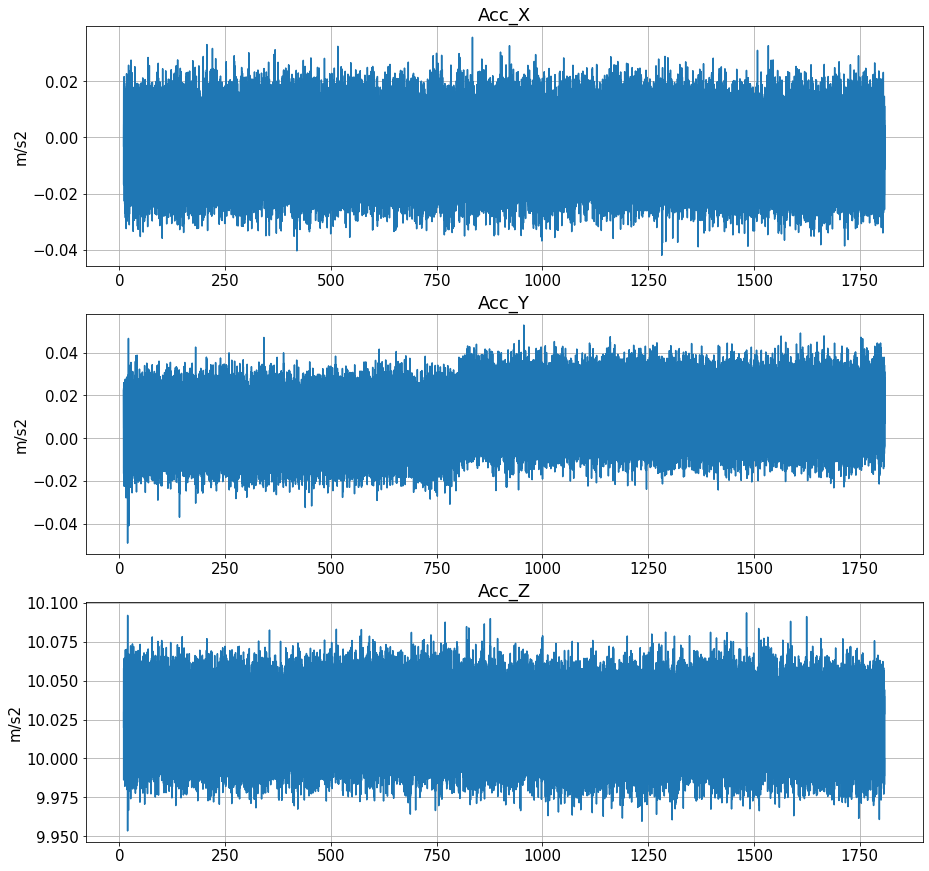

In [10]:
print_plot(CSV_DATA_DICT, TimeData, "m/s2", "sec", "Acc_X", "Acc_Y", "Acc_Z", number_of_subplots=3)

 ### пропускаем через апериодический фильтр

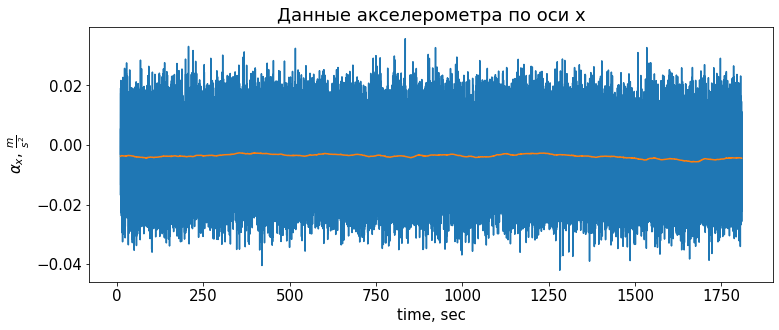

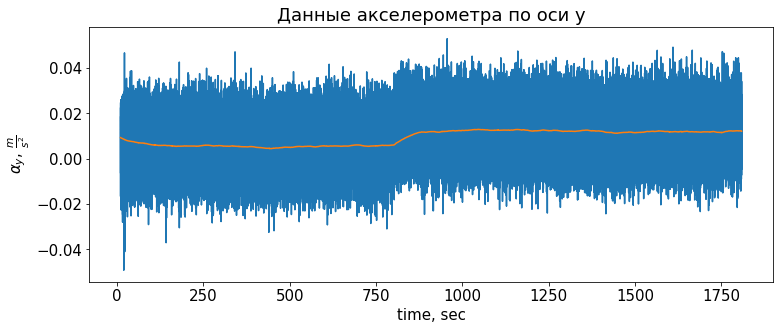

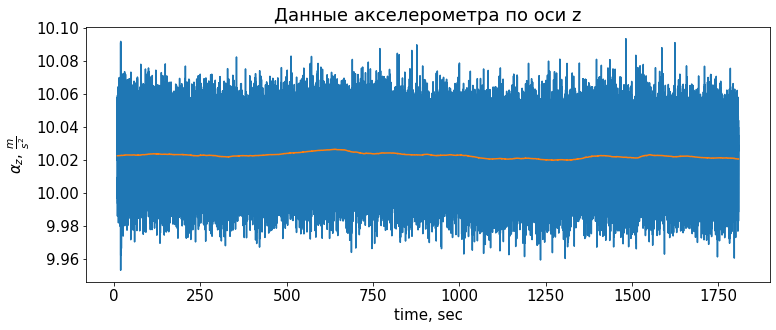

In [11]:
def print_filtered_data(xlabel, ylabel, title, time, data_unfiltered, data_filtered):
    plt.figure(figsize=(mm_to_inch(311),mm_to_inch(119)))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(time, data_unfiltered)
    plt.plot(time, data_filtered)
    plt.savefig("./images/"+title+".jpg", dpi=120)
    plt.show()

x_filt = filter(Xdata)
y_filt = filter(Ydata)
z_filt = filter(Zdata)
print_filtered_data("time, sec", '$\\alpha_x$, $\\frac{m}{s^2}$', "Данные акселерометра по оси x", TimeData, Xdata, x_filt)
print_filtered_data("time, sec", '$\\alpha_y$, $\\frac{m}{s^2}$', "Данные акселерометра по оси y", TimeData, Ydata, y_filt)
print_filtered_data("time, sec", '$\\alpha_z$, $\\frac{m}{s^2}$', "Данные акселерометра по оси z", TimeData, Zdata, z_filt)

 # Данные гироскопа. Время 30 минут.

In [12]:
CSV_DATA_DICT = get_data_from_csv("Gyr_X", "Gyr_Y", "Gyr_Z", file_name="csv_data/Sensors_and_orientation.csv")

cut_data(1000, CSV_DATA_DICT, "Gyr_X", "Gyr_Y", "Gyr_Z", "Gyr_X_time")

Xdata = np.asarray(CSV_DATA_DICT["Gyr_X"])
Ydata = np.asarray(CSV_DATA_DICT["Gyr_Y"])
Zdata = np.asarray(CSV_DATA_DICT["Gyr_Z"])
TimeData = np.asarray(CSV_DATA_DICT["Gyr_X_time"])

 ### среднеквадратичное отклонение

In [13]:
print("x std: ", np.std(Xdata))
print("y std: ", np.std(Ydata))
print("z std: ", np.std(Zdata))

x std:  0.0008858388544618747
y std:  0.0009029888365483863
z std:  0.0008450046262614447


 ### Cреднее по всем точкам

In [14]:
print("x mean:",np.mean(Xdata))
print("y mean:",np.mean(Ydata))
print("z mean:",np.mean(Zdata))

x mean: 0.0007228814317797741
y mean: -0.001302880836965223
z mean: 0.0014967150226807794


In [15]:
TimeData = TimeData / 100

 ## Графики

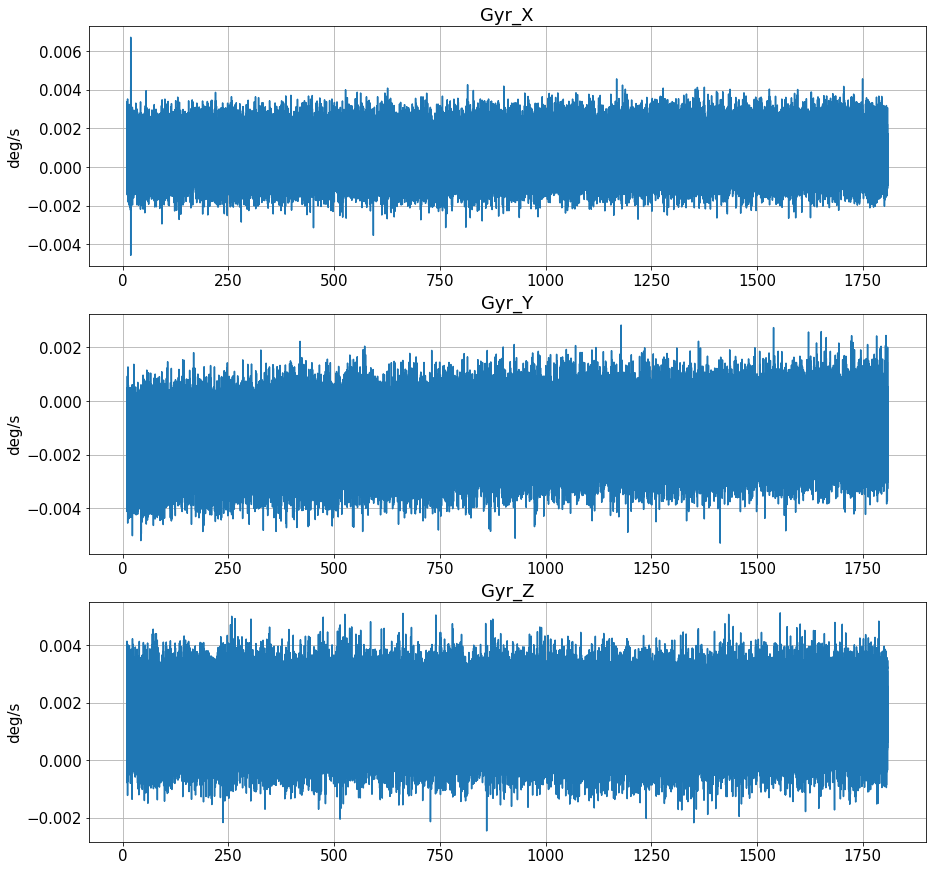

In [16]:
print_plot(CSV_DATA_DICT, TimeData, "deg/s", "sec", "Gyr_X", "Gyr_Y", "Gyr_Z", number_of_subplots=3)

 ### пропускаем через апериодический фильтр

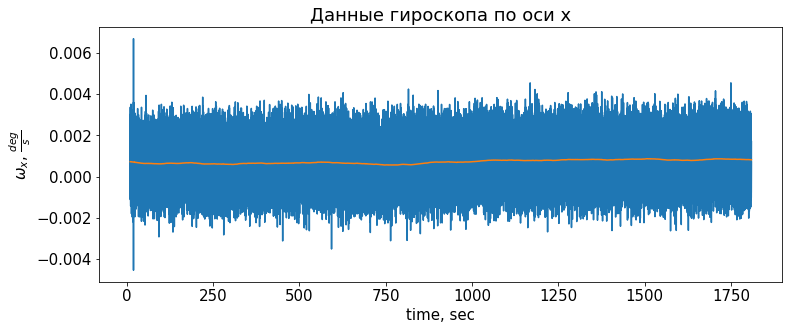

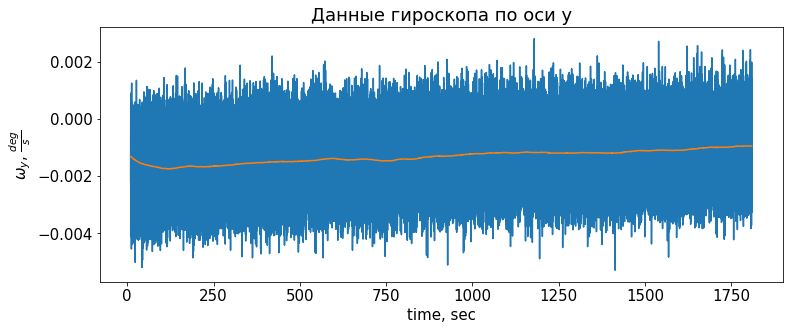

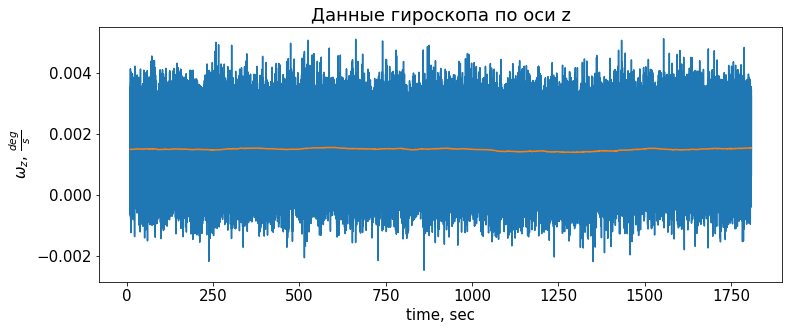

In [17]:
x_filt = filter(Xdata)
y_filt = filter(Ydata)
z_filt = filter(Zdata)

print_filtered_data("time, sec", '$\\omega_x$, $\\frac{deg}{s}$', "Данные гироскопа по оси x", TimeData, Xdata, x_filt)
print_filtered_data("time, sec", '$\\omega_y$, $\\frac{deg}{s}$', "Данные гироскопа по оси y", TimeData, Ydata, y_filt)
print_filtered_data("time, sec", '$\\omega_z$, $\\frac{deg}{s}$', "Данные гироскопа по оси z", TimeData, Zdata, z_filt)

 # Данные Магнетометра. Поворот на $360^\circ$

In [18]:
CSV_DATA_DICT = get_data_from_csv("Mag_X", "Mag_Y", "Yaw", file_name="csv_data/MAGFIELD.csv")
TimeData = np.asarray(CSV_DATA_DICT["Mag_X_time"])
TimeData = TimeData / 100

 ## Данные, с показаний алгоритма прибора

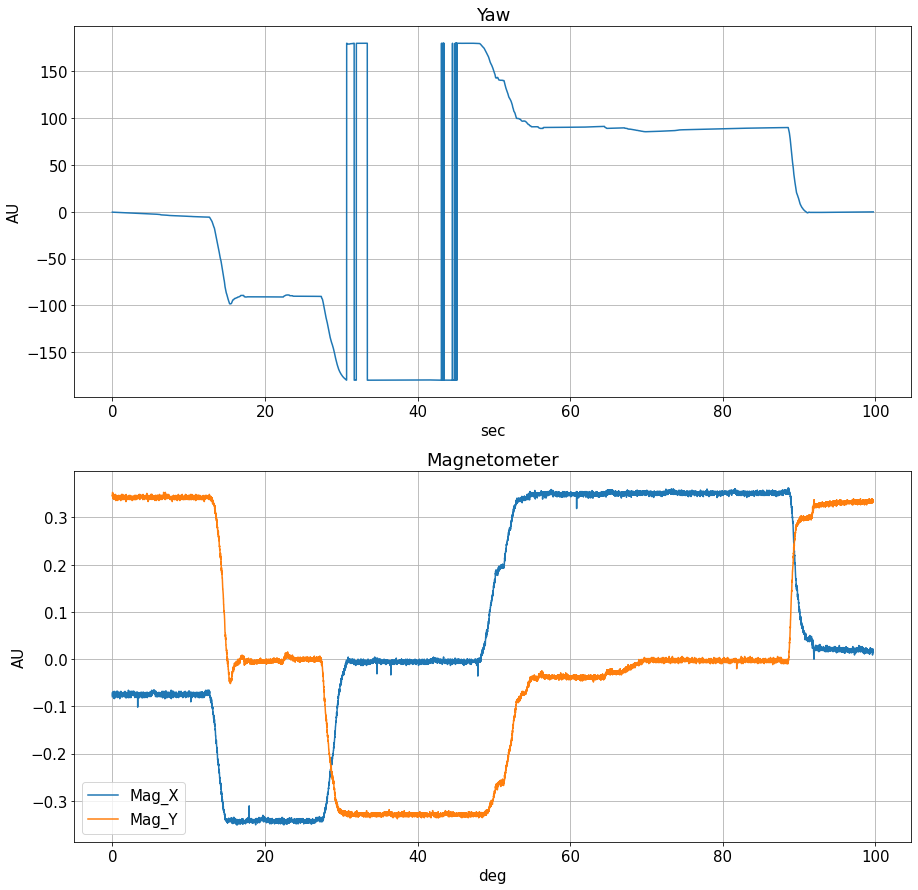

In [19]:
print_plot(CSV_DATA_DICT, TimeData, "AU", "sec", "Yaw", "Mag_X", "Mag_Y", number_of_subplots=2, title="Magnetometer", first_x_label="deg")

 ## Данные, посчитанные с показаний датчиков

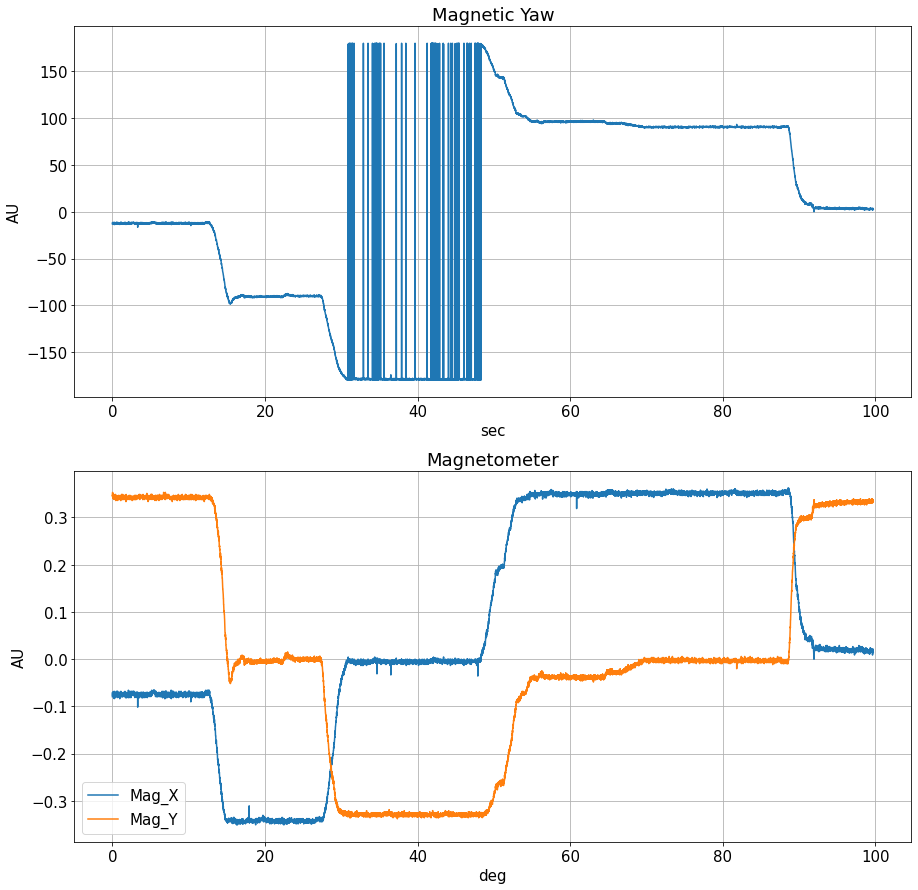

In [20]:
magE = np.asarray(CSV_DATA_DICT["Mag_X"])
magN = np.asarray(CSV_DATA_DICT["Mag_Y"])
res = np.arctan2(magE,magN)*180/np.pi
CSV_DATA_DICT.update({"Magnetic Yaw":res})
#plt.plot(CSV_DATA_DICT["Mag_X_time"], res)
print_plot(CSV_DATA_DICT, TimeData, "AU", "sec", "Magnetic Yaw", "Mag_X", "Mag_Y", number_of_subplots=2, title="Magnetometer", first_x_label="deg")

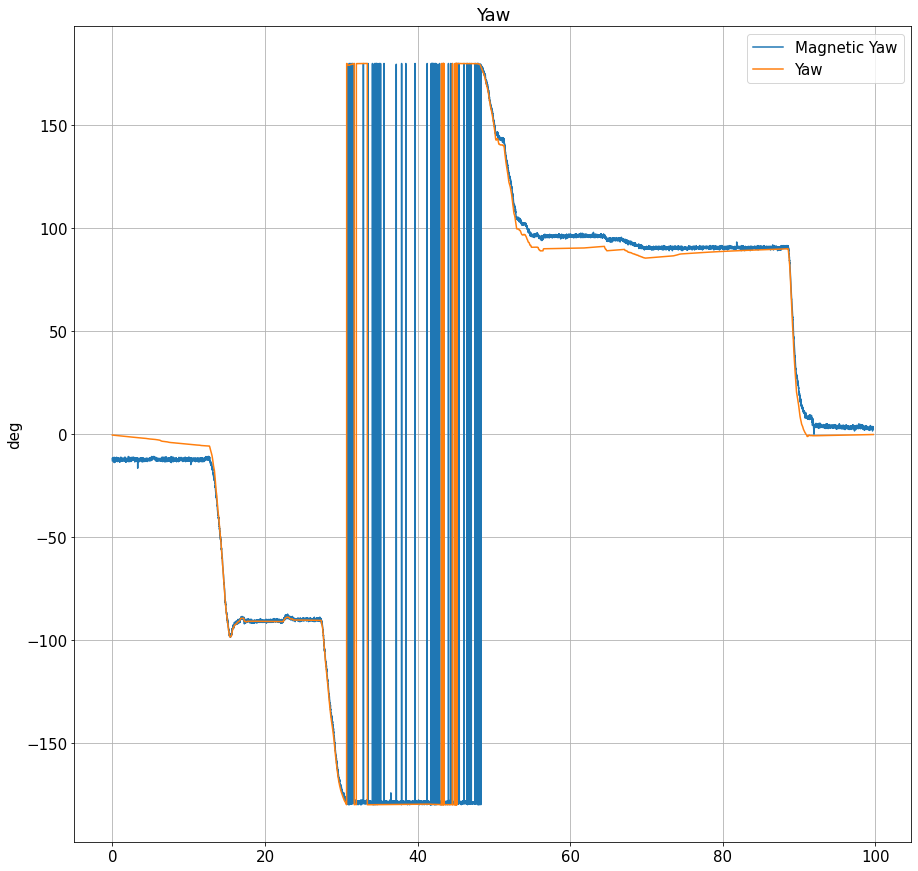

In [21]:
print_plot(CSV_DATA_DICT, TimeData, "deg", "sec", "Magnetic Yaw", "Yaw", number_of_subplots=1)

In [22]:
CSV_DATA_DICT = get_data_from_csv("Mag_X", "Mag_Y", "Yaw", file_name="csv_data/AntiClockwise.csv")
TimeData = np.asarray(CSV_DATA_DICT["Mag_X_time"])
TimeData = TimeData / 100

In [23]:
#print_plot(CSV_DATA_DICT, TimeData, "AU", "sec", "Yaw", "Mag_X", "Mag_Y", number_of_subplots=2, title="Magnetometer", first_x_label="deg")

 # Зависимость от температуры

 ## Гироскопы

In [24]:
CSV_DATA_DICT = get_data_from_csv("Gyr_X", "Gyr_Y", "Gyr_Z", "Temperature", file_name="csv_data/Temp.csv")
TimeData = np.asarray(CSV_DATA_DICT["Gyr_X_time"])
TimeData = TimeData / 100

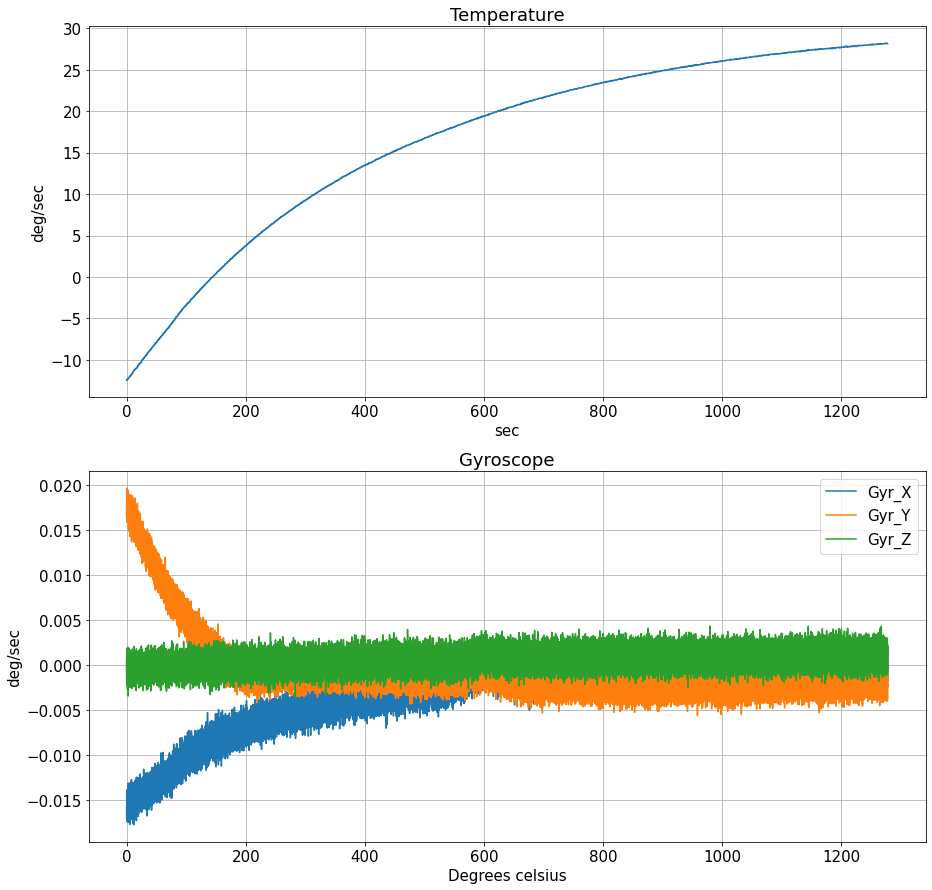

In [25]:
print_plot(CSV_DATA_DICT, TimeData, "deg/sec", "sec", "Temperature", "Gyr_X", "Gyr_Y", "Gyr_Z", number_of_subplots=2, title="Gyroscope", first_x_label="Degrees celsius")

 ## Акселерометры

In [26]:
CSV_DATA_DICT = get_data_from_csv("Acc_X", "Acc_Y", "Acc_Z", "Temperature", file_name="csv_data/Temp.csv")
TimeData = np.asarray(CSV_DATA_DICT["Acc_X_time"])
TimeData = TimeData / 100

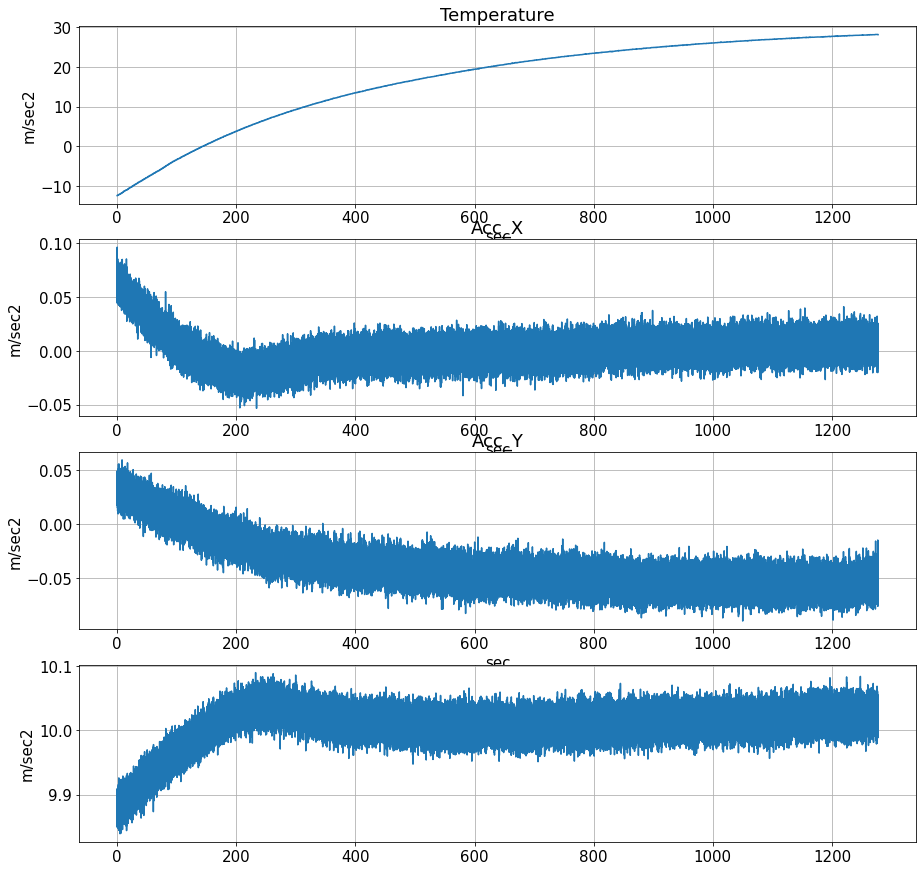

In [27]:
print_plot(CSV_DATA_DICT, TimeData, "m/sec2", "sec", "Temperature", "Acc_X", "Acc_Y", "Acc_Z", number_of_subplots=4, title="Gyroscope", first_x_label="Degrees celsius")